<a href="https://colab.research.google.com/github/Osval-13/COM300_Laboratorio_03/blob/main/Laboratorio_03_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logistica Binaria

**Universitarios:**

*   Pinto Barrón Osvaldo Dennis.
*   Velasquez Guerra Itzel Emily.


**Carrera:** Ingeniería en Diseño y Animación Digital.

**Temática del dataset:** Predicción de la salud física de una persona que fuma.

**Enlace del dataset:**  [Smoker Status Prediction](https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction/data)

**Formato:** El dataset consta de 22 columnas, de las cuales únicamente se hará uso de 6. El número total de filas es de 16709 datos.

Columnas usadas para la realización de la clasificación:

**Variables de entrada**
1.  Azúcar en la sangre.
2.  Colesterol.
3.  Triglicérido.
4.  HDL.
5.  LDL.

**Variable de salida**
6.   Caries dental

In [8]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Manejo de datos
import pandas as pd

# Libería para dividir el dataset
from sklearn.model_selection import train_test_split

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

import matplotlib.pyplot as plt
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si una persona posee caries en sus dientes.

### 1.1 Cargamos los datos

Evaluaremos 1000 datos.

In [9]:
data = pd.read_csv('/content/test_dataset.csv', delimiter=',')
df = pd.DataFrame(data)

# Asignamos los valores de X y de Y
X = data.iloc[:1000, [10,11,12,13,14]].values
y = data.iloc[:1000, 21].values

m = y.size

display(X,y)

array([[102, 225, 260,  41, 132],
       [ 96, 258, 345,  49, 140],
       [ 88, 177, 103,  53, 103],
       ...,
       [ 85, 166,  56,  64,  91],
       [ 83, 257, 168,  62, 161],
       [ 89, 219, 102,  65, 133]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

### 1.2 Normalizamos las características

Realizamos una copia para almacenar los datos y así guardarlos dentro de un vector que contendrá la media de cada característica.

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[102 225 260  41 132]
 [ 96 258 345  49 140]
 [ 88 177 103  53 103]
 ...
 [ 85 166  56  64  91]
 [ 83 257 168  62 161]
 [ 89 219 102  65 133]]
Media calculada: [ 98.331 197.081 120.981  57.842 115.226]
Desviación estandar calculada: [19.53298336 35.45380712 67.56213909 14.02565635 32.49056669]
[[ 0.18783613  0.78747537  2.05764651 -1.20079942  0.51627293]
 [-0.11933661  1.71826399  3.31574759 -0.63041613  0.76249824]
 [-0.52890026 -0.56639897 -0.26614018 -0.34522449 -0.37629384]
 ...
 [-0.68248663 -0.87666185 -0.96179607  0.43905254 -0.74563181]
 [-0.78487754  1.69005827  0.69593711  0.29645671  1.40883969]
 [-0.4777048   0.61824108 -0.28094137  0.51035045  0.54705109]]


Dividimos el dataset en entrenamiento (80% ) y prueba (20%).

In [12]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

Comprobamos el tamaño de ambos.

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


### 1.3 Visualización de los datos
Creamos una función para realizar la gráfica.

In [ ]:
def plotData(X, y):
    # Crea una nueva figura
    fig = pyplot.figure()

    # Indices negativos y positivos
    pos = y == 1
    neg = y == 0

    # Plot ejemplos
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


Se llama a la función implementada para mostrar los datos cargados:

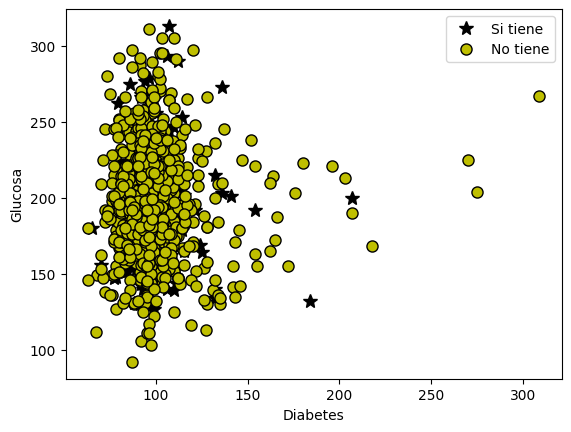

In [ ]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Diabetes')
pyplot.ylabel('Glucosa')
pyplot.legend(['Si tiene', 'No tiene'])
pass

### 1.4 Implementacion

#### 1.4.1 Fución Sigmoidea

Creamos la función "Sigmoid".

In [14]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con **z=0**, se debe obtener un resultado de 0.5.

In [15]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


#### 1.4.2 Función de Costo y Gradiente

Antes de continuar es importante agregar el termino de intercepcion a X_train y X_test.

In [16]:
# Agregar término de intercepción
def add_intercept(X):
    m, n = X.shape
    return np.concatenate([np.ones((m, 1)), X], axis=1)

X_train = add_intercept(X_train)
X_test = add_intercept(X_test)

Calculamos el Costo(J) y el descenso por la gradiente.

In [17]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [18]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

#### 1.4.3 Gráfica del costo (J)

theta calculado por el descenso por el gradiente: [-1.29550483 -0.02675273 -0.02499595 -0.00378269 -0.15691929  0.00138964]


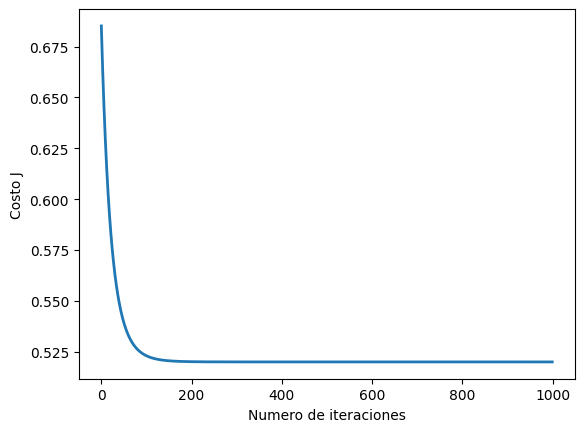

In [19]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.1
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [20]:
X_array = [1, 102, 225, 260, 41, 132]
y_predicted = sigmoid(np.dot(X_array, theta))
print('¿La persona tiene caries?:{:.0f}'.format(y_predicted))

¿La persona tiene caries?:0


In [21]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Calculamos las thetas de entrenamiento.

In [22]:
# Inicializacion de parametros de ajuste
n = X_train.shape[1]
initial_theta = np.zeros(n)
print(initial_theta)
cost, grad = costFunction(initial_theta, X_train, y_train)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))

[0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
[ 0.28375     0.00440684  0.0076019  -0.00249191  0.02378374 -0.00041558]
Gradiente en theta inicial (zeros):
	[0.2838, 0.0044, 0.0076, -0.0025, 0.0238, -0.0004]


Calculamos las tethas de prueba.

In [23]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([0.2838, 0.0044, 0.0076, -0.0025, 0.0238, -0.0004])
print(test_theta)
cost, grad = costFunction(test_theta, X_test, y_test)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[ 0.2838  0.0044  0.0076 -0.0025  0.0238 -0.0004]
Costo en theta prueba: 0.793
Gradiente en theta prueba:
	[0.381, -0.014, 0.027, -0.089, 0.049, 0.042]


#### 1.4.4 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

In [24]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Costo con un valor de theta encontrado por optimize.minimize: 0.520
theta:
	[-1.296, -0.026, 0.141, -0.066, -0.223, -0.150]


<ipython-input-24-91f7101c2e72>:4: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


<a id="section4"></a>
#### 1.4.5 Evaluación de la regresión logistica

 Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [25]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

### 1.5 Predicción y Evaluación de resultados

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

#### 1.5.1 Con el 80% de los datos

In [96]:
# Predice la probabilidad de que una persona tenga caries en los dientes
prob = sigmoid(np.dot([1, 102, 225, 260, 41, 1322], theta))
print('Para una persona que fuma tiene la probabilidad de tener caries dental de: {:.3f}%'.format(prob))

# Calculamos la predicción
p = predict(theta, X_train)
print('Precisión de entrenamiento con el 80% de los datos: {:.2f} %'.format(np.mean(p == y_train) * 100))

Para una persona que fuma tiene la probabilidad de tener caries dental de: 0.000%
Precisión de entrenamiento con el 80% de los datos: 78.38 %


#### 1.5.2 Con el 20% de los datos

In [97]:
prob_test = sigmoid(np.dot([1, 102, 225, 260, 41, 1322], test_theta))
print('Para una persona que fuma tiene la probabilidad de tener caries dental de: {:.3f}%'.format(prob_test))

p_test = predict(test_theta, X_test)
print('Precisión de prueba con el 20% de los datos: {:.2f} %'.format(np.mean(p_test == y_test) * 100))

Para una persona que fuma tiene la probabilidad de tener caries dental de: 0.904%
Precisión de prueba con el 20% de los datos: 19.00 %
